Data from https://github.com/lvzggg/portfolio_vqe 

In [1]:
import zipfile, os

zip_path = 'portfolio_vqe_data.zip'
extract_dir = 'portfolio_vqe_data'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

os.listdir(extract_dir)

['.git',
 'README.md',
 'covariance_matrix_2024.csv',
 'expected_returns_2024.csv',
 'stock_prices_2024.csv',
 'stock_returns_2024.csv',
 'portfolio_vqe_data']

In [2]:
os.listdir('portfolio_vqe_data')

['.git',
 'README.md',
 'covariance_matrix_2024.csv',
 'expected_returns_2024.csv',
 'stock_prices_2024.csv',
 'stock_returns_2024.csv',
 'portfolio_vqe_data']

In [4]:
import numpy as np
import pandas as pd
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms import SamplingVQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit_aer.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

In [50]:
#visualizing data
df_c_24 = pd.read_csv('portfolio_vqe_data/covariance_matrix_2024.csv')
df_e_24 = pd.read_csv('portfolio_vqe_data/expected_returns_2024.csv')
df_sp_24 = pd.read_csv('portfolio_vqe_data/stock_prices_2024.csv')
df_sr_24 = pd.read_csv('portfolio_vqe_data/stock_returns_2024.csv')

print(df_c_24.shape)
df_c_24.head()

(12, 13)


,Unnamed: 0,600519.SS,600036.SS,601318.SS,600406.SS,601857.SS,601988.SS,AAPL,MSFT,AMZN,GOOGL,NVDA,TSLA
0,600519.SS,0.000284,0.000144,0.000205,0.000058,0.000078,0.000034,0.000003,-2.454449e-06,4.251102e-06,0.000036,0.000044,1.457948e-05
1,600036.SS,0.000144,0.000227,0.000211,0.000057,0.000122,0.000093,0.000002,-7.396992e-06,-1.300673e-06,0.000036,0.000020,-9.596900e-07
2,601318.SS,0.000205,0.000211,0.000323,0.000085,0.000120,0.000067,0.000021,6.739278e-06,1.738954e-05,0.000052,0.000066,4.563272e-05
3,600406.SS,0.000058,0.000057,0.000085,0.000224,0.000076,0.000020,0.000003,-9.458268e-07,8.094970e-07,-0.000010,0.000011,-1.447082e-06
4,601857.SS,0.000078,0.000122,0.000120,0.000076,0.000423,0.000118,-0.000004,9.481942e-06,2.508072e-05,0.000055,0.000094,-6.756476e-05


In [51]:
print(df_c_24.shape)

(12, 13)


In [52]:
print(df_e_24.shape)
df_e_24.head()

(1, 12)


,600519.SS,600036.SS,601318.SS,600406.SS,601857.SS,601988.SS,AAPL,MSFT,AMZN,GOOGL,NVDA,TSLA
0,-0.000107,0.001738,0.001566,0.000709,0.0013,0.001512,0.001298,0.00063,0.001656,0.00142,0.00458,0.002762


In [53]:
print(df_sp_24.shape)
df_sp_24.head()

(260, 13)


,Date,600519.SS,600036.SS,601318.SS,600406.SS,601857.SS,601988.SS,AAPL,MSFT,AMZN,GOOGL,NVDA,TSLA
0,2024-01-02,1594.071289,24.933294,36.392601,21.084110,6.596822,3.651162,184.081482,366.707367,149.929993,137.346283,48.146576,248.419998
1,2024-01-03,1602.576050,25.105062,36.328056,21.370319,6.726172,3.687582,182.703171,366.440430,148.470001,138.091827,47.547840,238.449997
2,2024-01-04,1578.925293,25.141224,35.867043,21.351240,6.864761,3.769529,180.382812,363.810272,144.570007,135.576889,47.976654,237.929993
3,2024-01-05,1573.589600,25.575161,35.931583,21.169975,6.920196,3.751318,179.658936,363.622437,145.240005,134.920822,49.075157,237.490005
4,2024-01-08,1555.265015,25.430513,35.452126,20.912386,6.901718,3.733108,184.002167,370.484528,149.100006,138.012299,52.229752,240.449997


In [54]:
print(df_sr_24.shape)
df_sr_24.head()

(259, 13)


,Date,600519.SS,600036.SS,601318.SS,600406.SS,601857.SS,601988.SS,AAPL,MSFT,AMZN,GOOGL,NVDA,TSLA
0,2024-01-03,0.005335,0.006889,-0.001774,0.013575,0.019608,0.009975,-0.007488,-0.000728,-0.009738,0.005428,-0.012436,-0.040134
1,2024-01-04,-0.014758,0.001440,-0.012690,-0.000893,0.020604,0.022222,-0.012700,-0.007178,-0.026268,-0.018212,0.009019,-0.002181
2,2024-01-05,-0.003379,0.017260,0.001799,-0.008490,0.008075,-0.004831,-0.004013,-0.000516,0.004634,-0.004839,0.022897,-0.001849
3,2024-01-08,-0.011645,-0.005656,-0.013344,-0.012168,-0.002670,-0.004854,0.024175,0.018871,0.026577,0.022913,0.064281,0.012464
4,2024-01-09,-0.001819,0.001422,-0.001820,-0.004106,-0.001339,0.000000,-0.002263,0.002936,0.015225,0.015197,0.016975,-0.022832


In [55]:
print("the shape of covariance matrix: ",df_c_24.shape)
print("the shape of expeced return: ",df_e_24.shape)
print("the shape of stock price: ",df_sp_24.shape)
print("the shape of stock return: ",df_sr_24.shape)

the shape of covariance matrix:  (12, 13)
the shape of expeced return:  (1, 12)
the shape of stock price:  (260, 13)
the shape of stock return:  (259, 13)


In [90]:
# STEP A — Loading & cleaning the data which would be compatible to my code
raw_cov = pd.read_csv(base + "covariance_matrix_2024.csv")
sigma = raw_cov.iloc[1:, 1:].astype(float).values

# Extract tickers from the header (skip first empty cell)
tickers = list(raw_cov.columns[1:])
tickers = tickers[:len(raw_cov)-1]  # ensure alignment with covariance rows
print(" Tickers:", tickers)

print("\n Clean covariance matrix shape:", sigma.shape)

# Number of assets from covariance
N = sigma.shape[0]

# 2. Load stock returns
raw_returns = pd.read_csv(base + "stock_returns_2024.csv")
returns_only = raw_returns.iloc[:, 1:]  # drop date column

# 3. Compute expected returns
mu_all = returns_only.mean(axis=0).values

# ⚠ Fix: match mu length to sigma dimension
mu = mu_all[:N]

print(" \n Expected returns length:", len(mu))
print(" \n Number of assets:", N)

 Tickers: ['600519.SS', '600036.SS', '601318.SS', '600406.SS', '601857.SS', '601988.SS', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA']

 Clean covariance matrix shape: (11, 12)
 
 Expected returns length: 11
 
 Number of assets: 11


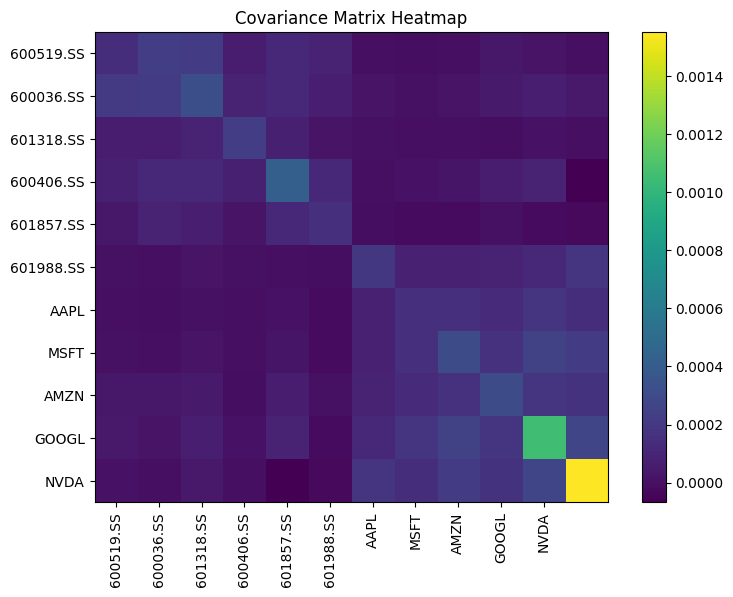

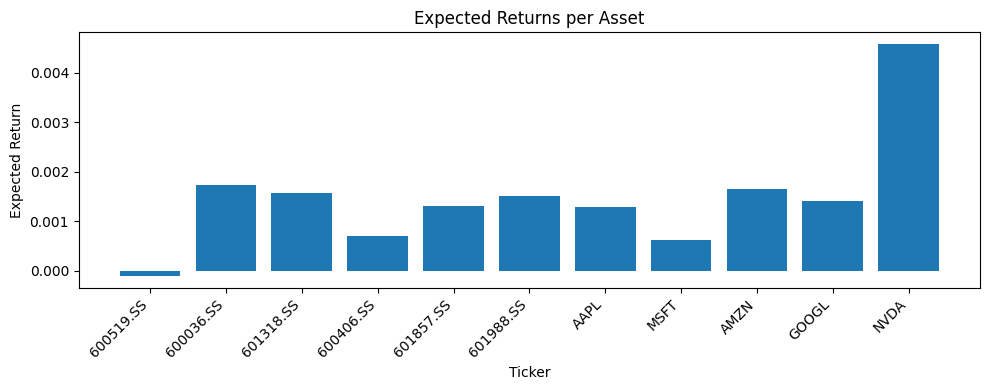

In [91]:
 # VISUALIZATIONS of cleaned datat

# Covariance heatmap with tickers
plt.figure(figsize=(8,6))
plt.imshow(sigma, cmap="viridis")
plt.title("Covariance Matrix Heatmap")
plt.colorbar()
plt.xticks(range(N), tickers, rotation=90)
plt.yticks(range(N), tickers)
plt.tight_layout()
plt.show()

# Expected returns bar chart with tickers
plt.figure(figsize=(10,4))
plt.bar(tickers, mu)
plt.title("Expected Returns per Asset")
plt.xlabel("Ticker")
plt.ylabel("Expected Return")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [93]:
# STEP B — Building QUBO MANUALLY
q = 0.5
budget = N // 2

# Objective: minimize  q * xᵀΣx  – μᵀx
Q = q * sigma
c = -mu

from qiskit_optimization import QuadraticProgram

qp = QuadraticProgram()

# Add binary decision variables
for i in range(N):
    qp.binary_var(f"x{i}")

# Set linear term
qp.objective.linear = c.tolist()

# Initialize quadratic matrix with zeros
quad_matrix = np.zeros((N, N))

# Fill quadratic matrix
for i in range(N):
    for j in range(N):
        quad_matrix[i, j] = Q[i, j]

# Assign quadratic part
qp.objective.quadratic = quad_matrix.tolist()

# Add budget constraint
qp.linear_constraint(
    linear={f"x{i}": 1 for i in range(N)},
    sense="==",
    rhs=budget,
    name="budget"
)

print("\n Quadratic Program constructed successfully:")
print(qp)


 Quadratic Program constructed successfully:
minimize 7.195609704585e-05*x0^2 + 0.00021617873351924998*x0*x1 + 1.7423025522744246e-05*x0*x10 + 0.00013435708935989043*x0*x2 + 6.710480741425077e-05*x0*x3 + 7.802985633204264e-05*x0*x4 + 4.8351730419549014e-05*x0*x5 - 3.3488849087342017e-07*x0*x6 - 1.5729450070290559e-06*x0*x7 + 1.7264586336361705e-05*x0*x8 + 4.015787214344938e-05*x0*x9 + 0.0001054238359804*x1^2 + 3.252866292282365e-05*x1*x10 + 0.0001900475177637449*x1*x2 + 0.00010336606866678222*x1*x3 + 0.00010684964482542898*x1*x4 + 3.42736771928674e-05*x1*x5 + 6.771946553923116e-06*x1*x6 + 2.7193026829005237e-06*x1*x7 + 2.6778189636362626e-05*x1*x8 + 3.614408884582453e-05*x1*x9 + 0.00013694850066235*x10^2 + 2.8400718102039223e-05*x2*x10 + 4.257862687978222e-05*x2^2 + 0.00017198432692875*x2*x3 + 7.119093464283172e-05*x2*x4 + 2.0405823789072925e-05*x2*x5 + 4.816384224764438e-06*x2*x6 + 8.221858400427818e-06*x2*x7 + 2.6415551785971827e-05*x2*x8 + 2.8001531809515697e-05*x2*x9 + 4.627364950

In [94]:
# STEP C — CLASSICAL SOLVER
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms import NumPyMinimumEigensolver

classical_solver = MinimumEigenOptimizer(NumPyMinimumEigensolver())
classical_result = classical_solver.solve(qp)

print("\n===== CLASSICAL OPTIMAL RESULT =====")
print("x =", classical_result.x)
print("value =", classical_result.fval)



===== CLASSICAL OPTIMAL RESULT =====
x = [0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
value = -0.010046125805780726


In [98]:
# STEP D —  QUANTUM VQE SOLVER WITH CONVERGENCE TRACKING
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import COBYLA, OptimizerResult
from qiskit_algorithms import SamplingVQE
from qiskit_aer.primitives import Sampler

# Track convergence
vqe_values = []

def callback(eval_count, params, value, meta):
    vqe_values.append(value)

ansatz = TwoLocal(N, "ry", "cz", reps=1)
optimizer = COBYLA(maxiter=100)

vqe = SamplingVQE(
    sampler=Sampler(),
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback
)

quantum_solver = MinimumEigenOptimizer(vqe)
quantum_result = quantum_solver.solve(qp)

print("\n===== QUANTUM (VQE) RESULT =====")
print("x =", quantum_result.x)
print("value =", quantum_result.fval)



===== QUANTUM (VQE) RESULT =====
x = [0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
value = -0.008801170532635873


/home/vandna/anaconda3/envs/mqt0/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/vandna/anaconda3/envs/mqt0/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


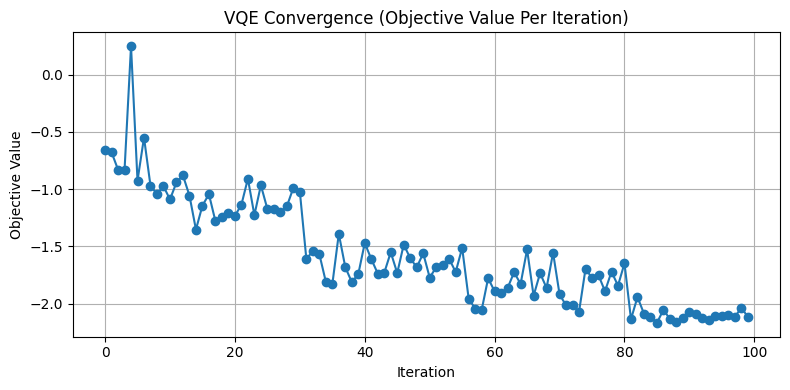

In [99]:
# my VQE CONVERGENCE PLOT
plt.figure(figsize=(8,4))
plt.plot(vqe_values, marker='o')
plt.title("VQE Convergence (Objective Value Per Iteration)")
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.grid(True)
plt.tight_layout()
plt.show()

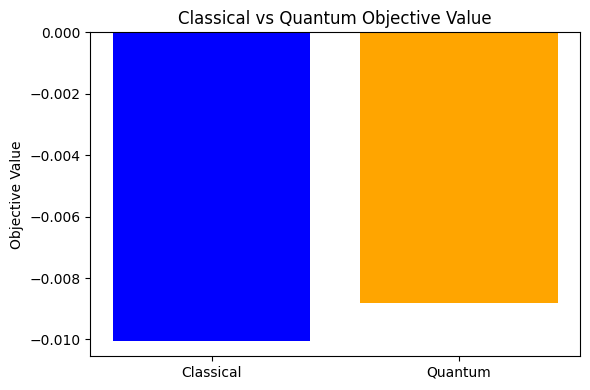

In [100]:
# BAR CHART: CLASSICAL VS QUANTUM PERFORMANCE

classical_val = classical_result.fval
quantum_val = quantum_result.fval

plt.figure(figsize=(6,4))
plt.bar(["Classical", "Quantum"], [classical_val, quantum_val], color=["blue","orange"])
plt.title("Classical vs Quantum Objective Value")
plt.ylabel("Objective Value")
plt.tight_layout()
plt.show()